# Recommender systems

## Collaborative filtering algorithm

**Problem:**

For given $y_{ij}$ estimate features $x_i$ and parameters $\theta_j$. $y_{ij}$ can have missing entries (in the following notebook we consider them as `np.nan`). 
Cost function can be described in the following way:

$$
J(x, \theta) = \frac12 \sum_{(i,j)\in Y}\left[ \theta_j^{\mathsf T}x_i - y_{ij}\right]^2 + \frac\lambda2\sum_{ik} x_{ik}^2 + \frac\lambda2\sum_{jk} \theta_{jk}^2,
$$

where sumation is for each $(i, j)$ which has valid value $y_{ij}$.

**Algorithm:**

1. Initialize features: $x_1, x_2, \dots, x_m$ and parameters $\theta_1, \theta_2, \dots, \theta_k$, (note: $\theta_i, x_i \in \mathbb R^n$).
2. Minimize cost function (using gradient descent or advanced optimization algorithm) 
$$
\min_{x,\theta} J(x, \theta),
$$
When using gradient descent, the update for the objectives can be expressed as follows
$$
x_{ik} \to x_{ik} - \alpha \sum_{j:(i,j)\in Y}(\theta_j^\mathsf{T}x_i - y_{ij})\theta_{jk} + \lambda x_{ik},
$$
$$
\theta_{jk} \to \theta_{jk} - \alpha \sum_{i: (i,j)\in Y}(\theta_j^\mathsf{T}x_i - y_{ij})x_{ik} + \lambda \theta_{jk},
$$
which can be simplified in the matrix form:
$$
\begin{cases}
\Delta x = -\alpha \left( \langle \theta x^{\mathsf T} -y\rangle^{\mathsf T} \theta + \lambda x\right) ,\\[1ex]
\Delta \theta = -\alpha \left( \langle \theta x^{\mathsf T} -y\rangle x + \lambda \theta\right) ,\\[1ex]
\end{cases}
$$
$$
\begin{cases}
x \to x + \Delta x,\\[1ex]
\theta \to \theta + \Delta \theta,
\end{cases}
$$
where $\langle...\rangle$ operator which "replaces" `nan` values with zeros.
3. Precict values using $\theta^\mathsf{T} x$.

The formulated problem can be used for example in "movie recommendation problem".
One could obtain similar movies using distance metric

$$
d_{ij}^2=\|x_i - x_j\|^2.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradient_descent(theta, x, y, max_iter=1_000, alpha=0.1, beta=0):
    for _ in range(max_iter):
        tmp = theta @ x.T - y
        tmp[np.isnan(tmp)] = 0
        dx = tmp.T @ theta + beta * x
        dtheta = tmp @ x + beta * theta
        x -= alpha * dx
        theta -= alpha * dtheta
    return theta, x

def cost(theta, x, y):
    tmp = theta @ x.T - y
    tmp[np.isnan(tmp)] = 0
    return 0.5 * (tmp ** 2).sum()


| movies | alice | bob | carol | dave | eve |
| --- | --- | --- | --- | --- | --- |
| $m_0$ | 4 | 5 | 0 | 1 | ? |
| $m_1$ | 5 | 4 | ? | 0 | ? |
| $m_2$ | 1 | 1 | 3 | 3 | ? |
| $m_3$ | ? | 2 | 4 | 5 | ? |
| $m_4$ | 2 | 1 | 5 | 4 | ? |
| $m_5$ | 2 | 1 | 5 | 4 | ? |

In [3]:
np.random.seed(42)

y = np.array(
    [
        [4, 5, 1, np.nan, 2, 2],
        [5, 4, 1, 2, 1, 1],
        [0, np.nan, 3, 4, 5, 5],
        [1, 0, 3, 5, 4, 4],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
    ]
)

n_users = y.shape[0]
n_movies = y.shape[1]
n_features = 2

x = 5 * np.random.rand(n_movies, n_features)
theta = np.random.rand(n_users, n_features)

costs = []
for i in range(10_000):
    theta, x = gradient_descent(theta, x, y, max_iter=1, alpha=0.001, beta=0)
    costs.append([i, cost(theta, x, y)])
costs = np.array(costs)

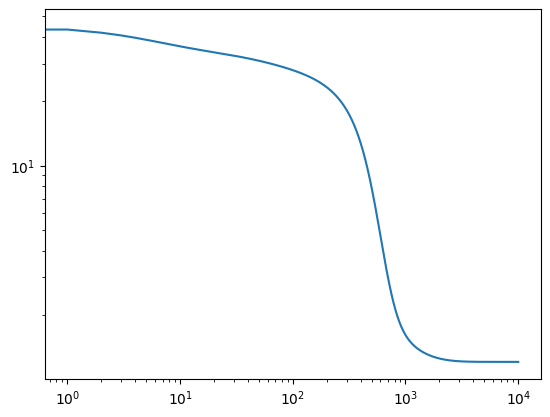

In [4]:
fig, ax = plt.subplots()
ax.plot(costs[:, 0], costs[:, 1])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()